In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

# Loading data set and assigning as DataFrame

In [31]:
data_f = pd.read_excel('PHONE FALL DATA FILE.xls')
data_acc = pd.read_excel('ACCIDENTAL DATA FILE.xlsx')
data_f.shape
data_f.head()

,ACTUAL TIME (ms),TIME INTERVAL (ms),Accel X,Accel Y
0,0,0,-3.237152,2.039383
1,8,8,-3.347595,1.998138
2,12,4,-3.489105,1.942612
3,15,3,-3.608948,1.878632
4,23,8,-3.689438,1.838272


In [32]:
 # Deep copy and new variable so that no change in Original Data set by refrence
acc = data_acc.copy(deep = True)#accidental dataset
fall= data_f.copy(deep = True) # fallen dataset
fall = fall.dropna(how = 'all') #droping row and column contain 'NAN'
fall.head() # Analysing Fallen Data

,ACTUAL TIME (ms),TIME INTERVAL (ms),Accel X,Accel Y
0,0,0,-3.237152,2.039383
1,8,8,-3.347595,1.998138
2,12,4,-3.489105,1.942612
3,15,3,-3.608948,1.878632
4,23,8,-3.689438,1.838272


In [33]:
acc.head() #Analysing Accidenal Data

,MS,X,Y
0,2,-9.8,2.2
1,4,-7.8,0.2
2,6,-7.8,1.8
3,8,-5.8,2.6
4,10,-4.6,1.0


## ploting graphs between between various features

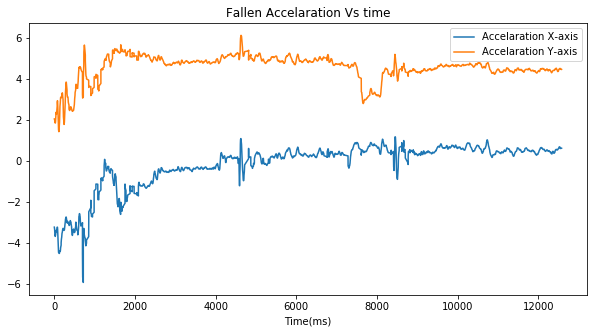

In [34]:
plt.figure(figsize=(10,5))
plt.plot(fall['ACTUAL TIME (ms)'],fall['Accel X'],fall['ACTUAL TIME (ms)'],fall['Accel Y'])
plt.title('Fallen Accelaration Vs time')
plt.xlabel('Time(ms)')
plt.legend(['Accelaration X-axis','Accelaration Y-axis'])

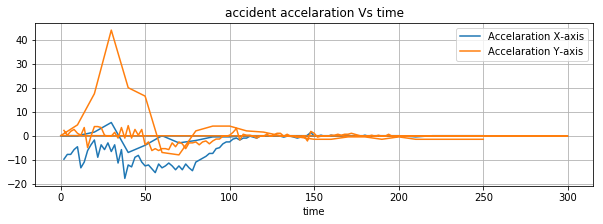

In [35]:
plt.figure(figsize =(10,3))
plt.plot(data_acc['MS'],data_acc['X'],data_acc['MS'],data_acc['Y'])
plt.title('accident accelaration Vs time')
plt.xlabel('time')
plt.grid(True)
plt.legend(['Accelaration X-axis','Accelaration Y-axis'])


## computing  G-force using given datasets

In [36]:
X_fall = fall['Accel X'] # in it net Accelaration Experience by phone
Y_fall = fall['Accel Y']
Net_acc = np.sqrt(np.add(np.square(X_fall),np.square(Y_fall)))
fall.insert(4,'Net_acc',Net_acc)
fall.head()

,ACTUAL TIME (ms),TIME INTERVAL (ms),Accel X,Accel Y,Net_acc
0,0,0,-3.237152,2.039383,3.825995
1,8,8,-3.347595,1.998138,3.898583
2,12,4,-3.489105,1.942612,3.993444
3,15,3,-3.608948,1.878632,4.068631
4,23,8,-3.689438,1.838272,4.122038


In [37]:
X_acc = acc['X']
Y_acc = acc['Y']
Net_accAcc = np.sqrt(np.add(np.square(X_acc),np.square(Y_acc)))
acc.insert(3,'Net_acc',Net_accAcc)
acc.tail()

,MS,X,Y,Net_acc
171,210,-0.5,-1.5,1.581139
172,220,0.0,-1.5,1.500000
173,230,0.0,-1.5,1.500000
174,240,0.0,-1.5,1.500000
175,250,0.0,-1.5,1.500000


In [38]:
## ploting curve between Net Accelaration

Text(0.5, 1.0, 'Net Accelaration of fallen of phone')

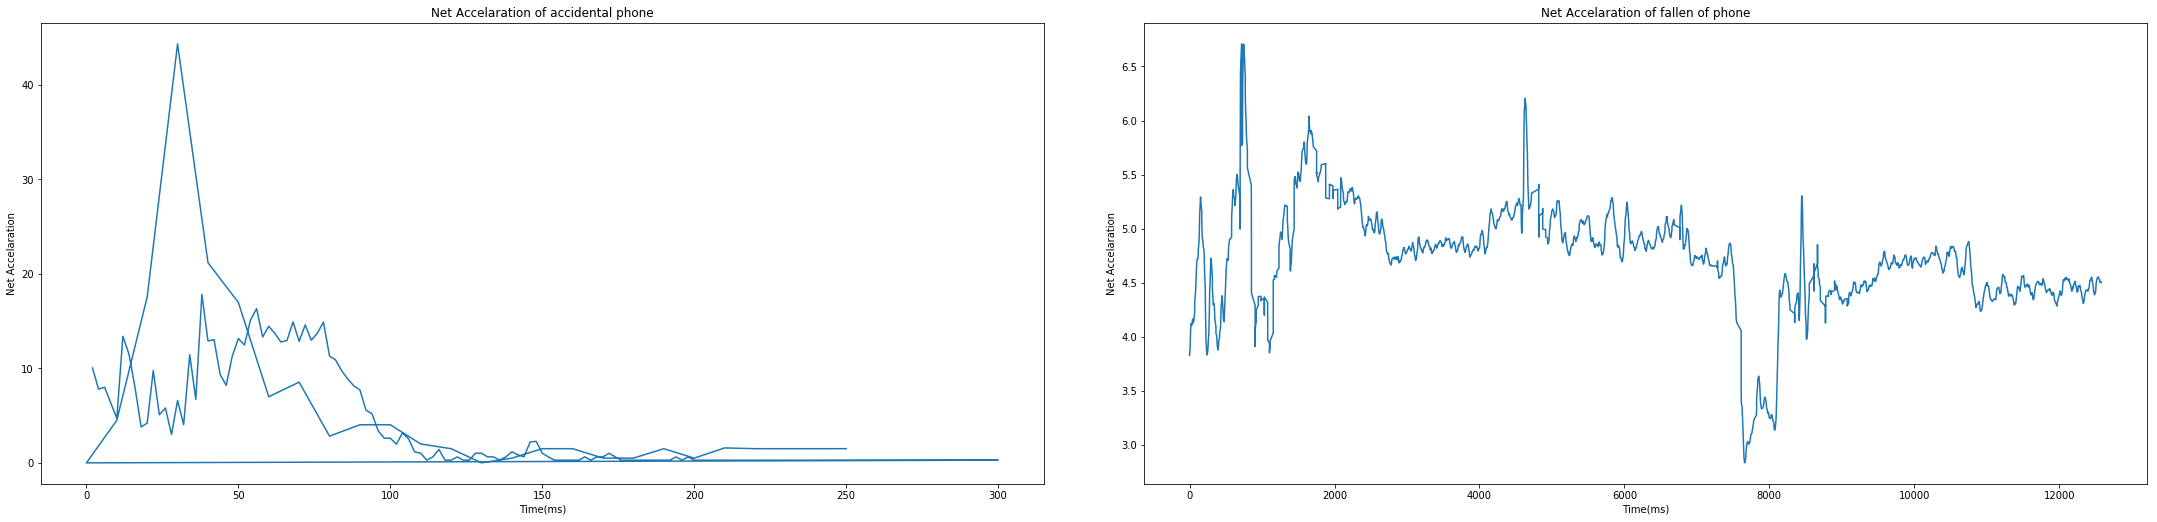

In [39]:
plt.subplot(1,2,1)
plt.plot(acc['MS'],acc['Net_acc'])
plt.title('Net Accelaration of accidental phone')
plt.xlabel('Time(ms)')
plt.ylabel('Net Accelaration')
plt.subplot(1,2,2)
plt.plot(fall['ACTUAL TIME (ms)'],fall['Net_acc'])
plt.subplots_adjust(top=2, bottom=0.4,right=5,wspace=.1)
plt.ylabel('Net Accelaration')
plt.xlabel('Time(ms)')
plt.title('Net Accelaration of fallen of phone')

In [40]:
acc.insert(4,'outcome',np.ones(len(acc['Y']))) #inserting outcome, '1' for occuring Accident and '0' for falling 
fall.insert(5,'outcome',np.zeros(len(fall['Accel Y'])))

Text(0, 0.5, 'Accelaration Y-axis')

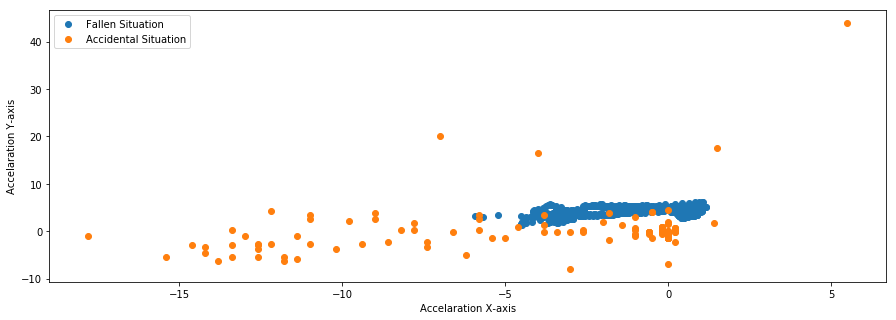

In [41]:
plt.figure(figsize = (15,5))
plt.scatter(fall['Accel X'],fall['Accel Y'])
plt.scatter(acc['X'],acc['Y'])
plt.legend(['Fallen Situation','Accidental Situation'])
plt.xlabel('Accelaration X-axis')
plt.ylabel('Accelaration Y-axis')

## some manupulation for desirable form of DataFrame 

In [42]:
acc = acc.rename(columns = {'X':'Accel X','Y':'Accel Y'}) # making column name same for append 
acc.head()

,MS,Accel X,Accel Y,Net_acc,outcome
0,2,-9.8,2.2,10.043904,1.0
1,4,-7.8,0.2,7.802564,1.0
2,6,-7.8,1.8,8.004998,1.0
3,8,-5.8,2.6,6.356099,1.0
4,10,-4.6,1.0,4.707441,1.0


In [43]:
fall = fall.append(acc,ignore_index = 'True',sort = 'False')
#fall.shape

In [44]:
new_data = pd.DataFrame(columns = ['Accel X','Accel Y','outcome']) #making new DataFrame for arrange dataset

In [45]:
new_data['Accel X'] = fall['Accel X'].copy(deep = 'True')
new_data['Accel Y'] = fall['Accel Y'].copy(deep = 'True')
new_data['outcome'] = fall['outcome'].copy(deep = 'True')
new_data.shape

(2675, 3)

In [46]:
np.random.shuffle(new_data.values)
y = new_data['outcome'] # assigned actual 'y' which is target Values
x = new_data.drop('outcome',axis = 1) # Feature Values
x.shape

(2675, 2)

## Training Dataset with Logistic Regression

In [47]:
accu = np.zeros((50,1))
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = i/100)
    classifier = LogisticRegression(solver='liblinear',max_iter=1000)
    Logic_R = classifier.fit(x_train,y_train) 
    y_pred  = Logic_R.predict(x_test)
    accu[i] = accuracy_score(y_test,y_pred)
  

(array([1, 2], dtype=int64), array([0, 0], dtype=int64))


Text(0.5, 0, 'portion of dataset')

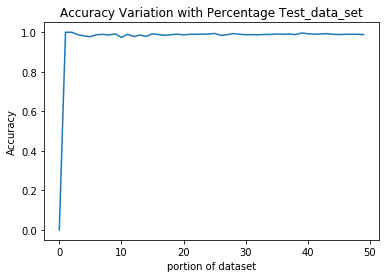

In [48]:
plt.plot(range(50),accu)
print(np.where(accu ==max(accu)))
plt.title('Accuracy Variation with Percentage Test_data_set')
plt.ylabel('Accuracy')
plt.xlabel('portion of dataset')

## Decision Boundary

(540, 253) (540, 253)
(136620,)
(-18.8, 6.400000000000357)
(-9.0, 44.89999999999981)


Text(0.5, 1.0, 'Decision Bouondry of Logistic Regression')

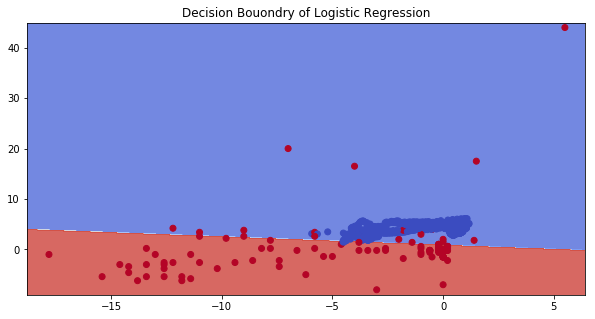

In [49]:
x_min, x_max = x['Accel X'].min() - 1, x['Accel X'].max() + 1
y_min, y_max = x['Accel Y'].min() - 1, x['Accel Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
print(xx.shape,yy.shape)
Z = Logic_R.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
Z.shape
plt.figure(figsize = (10,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x['Accel X'], x['Accel Y'], c=y, cmap=plt.cm.coolwarm)
print(plt.xlim(xx.min(), xx.max()))
print(plt.ylim(yy.min(), yy.max()))
plt.title('Decision Bouondry of Logistic Regression')

## Train dataset using SVM classifier

In [50]:
accu = np.zeros((50,1))
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = i/100)
    classifier = svm.SVC(kernel = 'linear')
    svm_model = classifier.fit(x_train,y_train)
    prediction  = svm_model.predict(x_test)
    accu[i] = accuracy_score(y_test,prediction)
     #finding Percision,recall ans Fscore of trained model
    print(precision_recall_fscore_support(y_test, prediction, average='weighted'))  

(1.0, 1.0, 1.0, None)
(0.9818376068376068, 0.9814814814814815, 0.9797195253505933, None)
(0.9878189300411523, 0.9876543209876543, 0.9872209156325488, None)
(0.9816713546865076, 0.9813084112149533, 0.9795308777716695, None)
(1.0, 1.0, 1.0, None)
(0.9817366624161902, 0.9813664596273292, 0.9802447080329878, None)
(0.9843192719222726, 0.9840425531914894, 0.9833869994530003, None)
(1.0, 1.0, 1.0, None)
(0.9836911419808768, 0.983402489626556, 0.9821985541574971, None)
(0.9962837024554646, 0.996268656716418, 0.9962269215636526, None)
(0.9966224514861214, 0.9966101694915255, 0.9965697861972741, None)
(0.993810326336755, 0.9937694704049844, 0.9935964671161134, None)
(0.9914591315453384, 0.9913793103448276, 0.9911458087645644, None)
(0.9842735042735042, 0.984, 0.9831800766283524, None)
(0.9805162668333723, 0.9800995024875622, 0.9785464213324909, None)
(0.9861921158035275, 0.985981308411215, 0.9853772833474935, None)
(0.9978073448799444, 0.9978021978021978, 0.9977842071135093, None)
(0.9897410531

(540, 253) (540, 253)
(136620,)


Text(0.5, 1.0, 'Decision Bouondry of SVM')

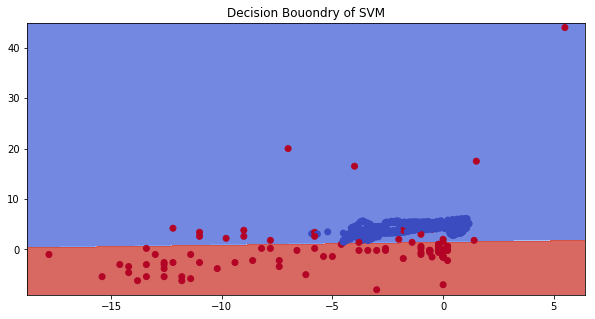

In [51]:
x_min, x_max = x['Accel X'].min() - 1, x['Accel X'].max() + 1
y_min, y_max = x['Accel Y'].min() - 1, x['Accel Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
print(xx.shape,yy.shape)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
Z.shape  
plt.figure(figsize=(10,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x['Accel X'], x['Accel Y'], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Bouondry of SVM')
plt.show()

## Prediction tool , Which Pridct and learn from input datas

In [ ]:
while True:
    # accepting input parameters
    x_1= input('enter accelaration in x-axis') 
    x_2= input('enter accelaration in y-axis')
    x_input = pd.DataFrame(columns= ['Accel X','Accel Y'])
    x_input.loc[len(x_input)] = [x_1,x_2]
    # predicting result
    prediction = svm_model.predict(x_input)
    if prediction ==0:
        print('phone has been fallen')
    else:
        print('accident has been occrured')
    # adding this set to our dataset
    x.loc[len(x)] = [x_1,x_2]
    # result will be add in diffrent manner 
    # we will ask to user "is this result is correct" if it will than add or not then add compliment result
    # also consider situation when user don't know about result "DNK"
    conf = str(input("enter 'y',for corret; 'n', for wrong; else 'DNK' "))
    if conf == 'Y' or conf == 'y' or conf == 'dnk' or conf == 'DNK':
        y = np.append(y,prediction)
    elif conf == 'N' or conf == 'n':
        if prediction ==1:
            prediction = 0
        else:
            prediction = 1
        y = np.append(y,prediction)
    print(x.shape,y.shape) # shape will change because it is adding input set to the dataset
    # dividing train and test set in to traditional way 60% & 40% respectively
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .4)
    classifier = svm.SVC(kernel = 'linear')
    svm_model = classifier.fit(x_train,y_train)
    # 'Y' for exit from loop
    YorN = str(input("enter 'Y' for exit"))
    if YorN == 'Y' or YorN == 'y':
        break

# Thank you very much 

Due to time and data shortage, I couldn't make this model as I was supposed to make.But if you will Provide me some more Data under your guidance. I can make a far better prediction Tool than this one. 


sorry for not considering the 'time' feature, But I have researched and found "Deep Convolutional and LSTM Recurrent Neural Networks" will be greatly beneficial for making accurate prediction tool.
Some research papers are below, which is proof of concept what I want to implement but couldn't.

https://www.mdpi.com/1424-8220/16/1/115/html
https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
https://www.researchgate.net/publication/221258784_Human_Activity_Recognition_from_Accelerometer_Data_Using_a_Wearable_Device

Thanks for giving me your time. let me know if I am wrong, Also Looking for Your valuable suggestion for me